# Palminteri analysis

Alana Jaskir <br>
Brown University, Providence, RI, USA <br>
Laboratory for Neural Computation and Cognition <br>
Michael Frank <br>

Average learning curves and trial-by-trial visualization of choice and reward and their impact
on G and N weights for a specified parameter combination

In [181]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import importlib
from sklearn import metrics
import pickle

import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))


In [182]:
# my models
import opal
from opal import OpAL
import palminteri
from scipy.stats import beta as beta_rv

In [183]:
importlib.reload(palminteri)
importlib.reload(opal)

<module 'opal' from '/Users/ajaskir/Desktop/FYP/opal/notebooks/../opal.py'>

In [184]:
# initialize
params = (.1,.06,7) # alpha_c, alpha_a, beta, alpha_c > alpha_a
n_subjs = 28 

v0=0
crit="S-ctx"

# DA mod?
mod = "constant"

# any other bells and whistles

In [185]:
states = palminteri.simulate(params,n_subjs,v0=v0,crit=crit,mod=mod,hebb=True, anneal=True, use_var=True)


In [186]:
# plot average choice rate
all_choicerates = []

first = True
for state in states:
    all_choicerates
    if first:
        all_choicerates = state.choice_rate
        first = False
    else:
        all_choicerates = np.vstack([state.choice_rate,all_choicerates])

avg_CR = np.mean(all_choicerates, axis = 0)
sem_CR = stats.sem(all_choicerates, axis = 0)

In [187]:
# states[0].V # sanity check critic

In [188]:
# for i in range(96):
#     print(states[0].ctx_order[i], states[0].C_in_ctx[i],states[0].PE[i])

/var/folders/x1/w7n6h7cn2z17zbtntm879lcw0000gp/T/ipykernel_79339/323477008.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_partial.set_xticklabels(["","G$_{75}$","G$_{25}$","L$_{25}$","L$_{75}$"])
/var/folders/x1/w7n6h7cn2z17zbtntm879lcw0000gp/T/ipykernel_79339/323477008.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_full.set_xticklabels(["","G$_{75}$","G$_{25}$","L$_{25}$","L$_{75}$"])


[Text(-1.0, 0, ''),
 Text(0.0, 0, 'G$_{75}$'),
 Text(1.0, 0, 'G$_{25}$'),
 Text(2.0, 0, 'L$_{25}$'),
 Text(3.0, 0, 'L$_{75}$'),
 Text(4.0, 0, '')]

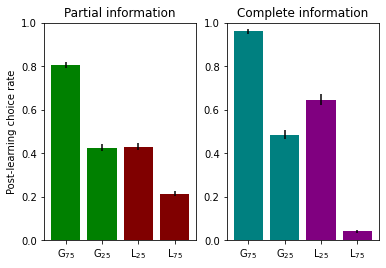

In [189]:
# plot the things
xaxis = np.arange(0,4)

partial_subset = [2,3,6,7]
ax_partial = plt.subplot(121)
ax_partial.set_title("Partial information")
ax_partial.set_ylabel("Post-learning choice rate")
ax_partial.bar(xaxis,avg_CR[partial_subset],yerr = sem_CR[partial_subset], color=["green", "green", "maroon", "maroon"])
ax_partial.set_ylim([0,1])
ax_partial.set_xticklabels(["","G$_{75}$","G$_{25}$","L$_{25}$","L$_{75}$"])

full_subset = [0,1,4,5]
ax_full = plt.subplot(122)
ax_full.set_title("Complete information")
ax_full.bar(xaxis,avg_CR[full_subset],yerr = sem_CR[full_subset], color=["teal", "teal", "purple", "purple"])
ax_full.set_ylim([0,1])
ax_full.set_xticklabels(["","G$_{75}$","G$_{25}$","L$_{25}$","L$_{75}$"])


### various first pass analysis

In [190]:
ctx_dict = {0: np.array([0,1]),
				1: np.array([2,3]),
				2: np.array([4,5]),
				3: np.array([6,7])}

In [191]:
subset_act = [row[ctx_dict[states[0].ctx_order[idx]]]for idx,row in enumerate(states[0].Act[0:96])]
subset_sm = [row[ctx_dict[states[0].ctx_order[idx]]]for idx,row in enumerate(states[0].SM[0:96])]
subset_Gs = [row[ctx_dict[states[0].ctx_order[idx]]]for idx,row in enumerate(states[0].QG[0:96])]
subset_Ns = [row[ctx_dict[states[0].ctx_order[idx]]]for idx,row in enumerate(states[0].QN[0:96])]

In [192]:
states[0].V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.05      ,  0.        ,  0.        ],
       [ 0.        ,  0.05      , -0.05      ,  0.        ],
       [ 0.        ,  0.05      , -0.045     ,  0.        ],
       [ 0.        ,  0.05      , -0.045     , -0.05      ],
       [ 0.        ,  0.05      , -0.045     , -0.095     ],
       [ 0.05      ,  0.05      , -0.045     , -0.095     ],
       [ 0.05      ,  0.05      , -0.045     , -0.0855    ],
       [ 0.05      ,  0.05      , -0.045     , -0.07695   ],
       [ 0.05      ,  0.045     , -0.045     , -0.07695   ],
       [ 0.05      ,  0.0405    , -0.045     , -0.07695   ],
       [ 0.045     ,  0.0405    , -0.045     , -0.07695   ],
       [ 0.0905    ,  0.0405    , -0.045     , -0.07695   ],
       [ 0.0905    ,  0.08645   , -0.045     , -0.07695   ],
       [ 0.0905    ,  0.077805  , -0.045     , -0.07695   ],
       [ 0.0905    ,  0.077805  , -0.0905    , -0.07695   ],
       [ 0.0905    ,  0.